In [222]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('C:/Users/Admin/Desktop/major int 247/dermatology.csv')

In [223]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 35 columns):
erythema                                     366 non-null int64
scaling                                      366 non-null int64
definite borders                             366 non-null int64
itching                                      366 non-null int64
koebner phenomenon                           366 non-null int64
polygonal papues                             366 non-null int64
follicular papules                           366 non-null int64
oral mucosal involvement                     366 non-null int64
knee and elbow involvement                   366 non-null int64
scalp involvement                            366 non-null int64
family history                               366 non-null int64
melanin incontinence                         366 non-null int64
eosinophils in the infiltrate                366 non-null int64
PNL infiltrate                               366 non-null int64

In [224]:
data.head()

,erythema,scaling,definite borders,itching,koebner phenomenon,polygonal papues,follicular papules,oral mucosal involvement,knee and elbow involvement,scalp involvement,...,disappearance of the granular layer,vacuolisation and damage of basal layer,spongiosis,saw-tooth appearance of retes,follicular horn plug,perifollicular parakeratosis,inflammatory monoluclear inflitrate,band-like infiltrate,Age,output
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,3


In [225]:
data['Age']=pd.to_numeric(data['Age'],errors='coerce')

In [226]:
data['Age'].fillna(round(data['Age'].mean()),inplace=True)

In [227]:
data.apply(lambda x:sum(x.isnull()))

erythema                                      0
scaling                                       0
definite borders                              0
itching                                       0
koebner phenomenon                            0
polygonal papues                              0
follicular papules                            0
oral mucosal involvement                      0
knee and elbow involvement                    0
scalp involvement                             0
family history                                0
melanin incontinence                          0
eosinophils in the infiltrate                 0
PNL infiltrate                                0
fibrosis of the papillary dermis              0
exocytosis                                    0
acanthosis                                    0
hyperkeratosis                                0
parakeratosis                                 0
clubbing of the rete ridges\n                 0
elongation of the rete ridges\n         

In [228]:
x=data.iloc[ : ,1:-1]

In [229]:
x.head()

,scaling,definite borders,itching,koebner phenomenon,polygonal papues,follicular papules,oral mucosal involvement,knee and elbow involvement,scalp involvement,family history,...,focal hypergranulosis,disappearance of the granular layer,vacuolisation and damage of basal layer,spongiosis,saw-tooth appearance of retes,follicular horn plug,perifollicular parakeratosis,inflammatory monoluclear inflitrate,band-like infiltrate,Age
0,2,0,3,0,0,0,0,1,0,0,...,0,0,0,3,0,0,0,1,0,55.0
1,3,3,2,1,0,0,0,1,1,1,...,0,0,0,0,0,0,0,1,0,8.0
2,1,2,3,1,3,0,3,0,0,0,...,2,0,2,3,2,0,0,2,3,26.0
3,2,2,0,0,0,0,0,3,2,0,...,0,3,0,0,0,0,0,3,0,40.0
4,3,2,2,2,2,0,2,0,0,0,...,2,2,3,2,3,0,0,2,3,45.0


In [230]:
y = data['output']

In [231]:
y.tail()

361    4
362    4
363    3
364    3
365    1
Name: output, dtype: int64

In [232]:
data['output'].value_counts()

1    112
3     72
2     61
5     52
4     49
6     20
Name: output, dtype: int64

In [233]:
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
parameters = {"criterion": ["gini", "entropy"],
              "min_samples_split": randint(2, 20),
              "max_depth": randint(5, 10),
              "min_samples_leaf": randint(1, 20),
              "max_leaf_nodes": randint(10, 20)}

clf = DecisionTreeClassifier()

In [234]:
from sklearn.model_selection import RandomizedSearchCV
best_param = RandomizedSearchCV(clf,param_distributions=parameters,scoring = "accuracy",cv=10,n_iter=20)

In [235]:
best_param.fit(x,y)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=10, error_score='raise-deprecating',
          estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          fit_params=None, iid='warn', n_iter=20, n_jobs=None,
          param_distributions={'criterion': ['gini', 'entropy'], 'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000019B235B3748>, 'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000019B235B3898>, 'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000019B235B32B0>, 'max_leaf_nodes': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000019B235CDE48>},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,

In [236]:
best_param.best_params_

{'criterion': 'entropy',
 'max_depth': 9,
 'max_leaf_nodes': 13,
 'min_samples_leaf': 4,
 'min_samples_split': 12}

In [237]:
best_param.best_score_

0.9590163934426229

In [238]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [239]:
print(x_train.shape)   
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(292, 33)
(74, 33)
(292,)
(74,)


In [240]:
classifier = DecisionTreeClassifier(criterion='gini',max_depth=8,
                                    max_leaf_nodes=15,min_samples_leaf=4,
                                    min_samples_split=5)

In [241]:
classifier.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
            max_features=None, max_leaf_nodes=15,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=5,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [242]:
y_pred = classifier.predict(x_test)

In [243]:
y_pred

array([1, 2, 1, 1, 4, 5, 3, 4, 2, 5, 4, 5, 5, 2, 1, 2, 5, 6, 5, 4, 2, 4,
       1, 3, 5, 4, 1, 3, 3, 2, 1, 4, 4, 5, 2, 5, 1, 2, 1, 1, 3, 6, 1, 6,
       3, 3, 1, 5, 4, 1, 3, 4, 3, 4, 2, 5, 1, 1, 5, 4, 1, 3, 4, 1, 1, 5,
       2, 3, 2, 1, 1, 1, 5, 1], dtype=int64)

In [244]:
from sklearn import metrics
print(metrics.accuracy_score(y_test,y_pred))

0.9594594594594594


In [245]:
from sklearn.metrics import confusion_matrix
pd.DataFrame(
    confusion_matrix(y_test, y_pred),
    columns=['Predicted psoriasis', 'Predicted seboreic dermatitis', 'Predicted lichen planus', 'Predicted pityriasis rosea', 'Predicted chronic dermatitis', 'Predicted pityriasis rubra pilaris' ],
    index=['psoriasis', 'seboreic dermatitis', 'lichen planus', 'pityriasis rosea', 'chronic dermatitis', 'pityriasis rubra pilaris']
)

,Predicted psoriasis,Predicted seboreic dermatitis,Predicted lichen planus,Predicted pityriasis rosea,Predicted chronic dermatitis,Predicted pityriasis rubra pilaris
psoriasis,21,0,0,0,0,0
seboreic dermatitis,0,10,0,0,0,0
lichen planus,0,0,11,0,1,0
pityriasis rosea,0,1,0,13,0,0
chronic dermatitis,1,0,0,0,13,0
pityriasis rubra pilaris,0,0,0,0,0,3


In [246]:
cm = confusion_matrix(y_test,y_pred)

In [247]:
cm.shape

(6, 6)

In [248]:
import matplotlib.pyplot as plt
import itertools
def plot_confusion_matrix(cm,classes,
                          normalize=False,
                          title='Confusion matrix',
                         cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
        print('Normalized Confusion Matrix')
    else:
        print('Confusion matrix,without normalization')
    
    print(cm)
    
    thresh = cm.max()/2,
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        
        plt.text(j,i,cm[i,j],
                horizontalalignment='center',
                color='white' if cm[i,j] > thresh else 'black')
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix,without normalization
[[21  0  0  0  0  0]
 [ 0 10  0  0  0  0]
 [ 0  0 11  0  1  0]
 [ 0  1  0 13  0  0]
 [ 1  0  0  0 13  0]
 [ 0  0  0  0  0  3]]


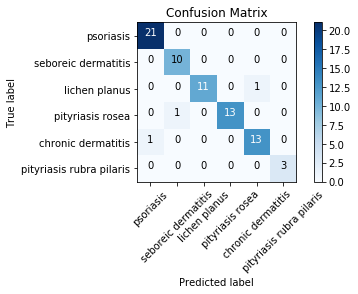

In [249]:
cm_plot_labels = ['psoriasis', 'seboreic dermatitis', 'lichen planus', 'pityriasis rosea', 'chronic dermatitis', 'pityriasis rubra pilaris']
plot_confusion_matrix(cm,cm_plot_labels,title='Confusion Matrix')

In [250]:
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint
parameters = {"criterion": ["gini", "entropy"],
              "min_samples_split": randint(2, 20),
              "max_depth": randint(5, 10),
              "min_samples_leaf": randint(1, 20),
              "max_leaf_nodes": randint(10, 20)}

clf = RandomForestClassifier(random_state=0)

In [251]:
from sklearn.model_selection import RandomizedSearchCV
best_param = RandomizedSearchCV(clf,param_distributions=parameters,scoring = "accuracy",cv=10,n_iter=20)

In [252]:
best_param.fit(x_train,y_train)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: F

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: F

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: F

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: F

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: F

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: F

RandomizedSearchCV(cv=10, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=20, n_jobs=None,
          param_distributions={'criterion': ['gini', 'entropy'], 'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000019B235787F0>, 'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000019B23578550>, 'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000019B23599D68>, 'max_leaf_nodes': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000019B235C3E48>},
  

In [253]:
best_param.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_leaf_nodes': 17,
 'min_samples_leaf': 1,
 'min_samples_split': 6}

In [254]:
best_param.best_score_

0.976027397260274

In [255]:
classifier = RandomForestClassifier(criterion= 'gini',max_depth= 6,
                                    max_leaf_nodes= 16,min_samples_leaf= 4,
                                    min_samples_split= 2,random_state=0)

In [256]:
classifier.fit(x_train,y_train)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=6, max_features='auto', max_leaf_nodes=16,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [257]:
y_pred = classifier.predict(x_test)

In [258]:
from sklearn import metrics
print(metrics.accuracy_score(y_test,y_pred))

0.9594594594594594


In [259]:
from sklearn.metrics import confusion_matrix
pd.DataFrame(
    confusion_matrix(y_test, y_pred),
    columns=['Predicted psoriasis', 'Predicted seboreic dermatitis', 'Predicted lichen planus', 'Predicted pityriasis rosea', 'Predicted chronic dermatitis', 'Predicted pityriasis rubra pilaris' ],
    index=['psoriasis', 'seboreic dermatitis', 'lichen planus', 'pityriasis rosea', 'chronic dermatitis', 'pityriasis rubra pilaris']
)

,Predicted psoriasis,Predicted seboreic dermatitis,Predicted lichen planus,Predicted pityriasis rosea,Predicted chronic dermatitis,Predicted pityriasis rubra pilaris
psoriasis,21,0,0,0,0,0
seboreic dermatitis,0,10,0,0,0,0
lichen planus,0,0,12,0,0,0
pityriasis rosea,0,2,0,12,0,0
chronic dermatitis,0,0,0,0,14,0
pityriasis rubra pilaris,0,1,0,0,0,2


In [260]:
cm = confusion_matrix(y_test,y_pred)

In [261]:
cm.shape

(6, 6)

In [262]:
import matplotlib.pyplot as plt
import itertools
def plot_confusion_matrix(cm,classes,
                          normalize=False,
                          title='Confusion matrix',
                         cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
        print('Normalized Confusion Matrix')
    else:
        print('Confusion matrix,without normalization')
    
    print(cm)
    
    thresh = cm.max()/2,
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        
        plt.text(j,i,cm[i,j],
                horizontalalignment='center',
                color='white' if cm[i,j] > thresh else 'black')
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix,without normalization
[[21  0  0  0  0  0]
 [ 0 10  0  0  0  0]
 [ 0  0 12  0  0  0]
 [ 0  2  0 12  0  0]
 [ 0  0  0  0 14  0]
 [ 0  1  0  0  0  2]]


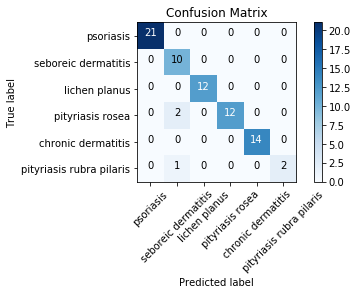

In [263]:
cm_plot_labels = ['psoriasis', 'seboreic dermatitis', 'lichen planus', 'pityriasis rosea', 'chronic dermatitis', 'pityriasis rubra pilaris']
plot_confusion_matrix(cm,cm_plot_labels,title='Confusion Matrix')

In [264]:
from sklearn.svm import SVC  
svclassifier = SVC(kernel='linear')  
svclassifier.fit(X_train, y_train) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [265]:
best_param.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_leaf_nodes': 17,
 'min_samples_leaf': 1,
 'min_samples_split': 6}

In [266]:
best_param.best_score_

0.976027397260274

In [267]:
y_pred = svclassifier.predict(X_test)

In [268]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred)) 

[[11  3  5  0  1  1]
 [ 5  1  4  0  0  0]
 [ 8  0  2  2  0  0]
 [ 7  5  2  0  0  0]
 [ 7  1  6  0  0  0]
 [ 1  1  0  1  0  0]]
              precision    recall  f1-score   support

           1       0.28      0.52      0.37        21
           2       0.09      0.10      0.10        10
           3       0.11      0.17      0.13        12
           4       0.00      0.00      0.00        14
           5       0.00      0.00      0.00        14
           6       0.00      0.00      0.00         3

   micro avg       0.19      0.19      0.19        74
   macro avg       0.08      0.13      0.10        74
weighted avg       0.11      0.19      0.14        74



In [269]:
y_pred = classifier.predict(x_test)

In [270]:
from sklearn import metrics
print(metrics.accuracy_score(y_test,y_pred))

0.9594594594594594


In [271]:
from sklearn.metrics import confusion_matrix
pd.DataFrame(
    confusion_matrix(y_test, y_pred),
    columns=['Predicted psoriasis', 'Predicted seboreic dermatitis', 'Predicted lichen planus', 'Predicted pityriasis rosea', 'Predicted chronic dermatitis', 'Predicted pityriasis rubra pilaris' ],
    index=['psoriasis', 'seboreic dermatitis', 'lichen planus', 'pityriasis rosea', 'chronic dermatitis', 'pityriasis rubra pilaris']
)

,Predicted psoriasis,Predicted seboreic dermatitis,Predicted lichen planus,Predicted pityriasis rosea,Predicted chronic dermatitis,Predicted pityriasis rubra pilaris
psoriasis,21,0,0,0,0,0
seboreic dermatitis,0,10,0,0,0,0
lichen planus,0,0,12,0,0,0
pityriasis rosea,0,2,0,12,0,0
chronic dermatitis,0,0,0,0,14,0
pityriasis rubra pilaris,0,1,0,0,0,2


In [272]:
cm = confusion_matrix(y_test,y_pred)

In [273]:
cm.shape

(6, 6)

In [274]:
import matplotlib.pyplot as plt
import itertools
def plot_confusion_matrix(cm,classes,
                          normalize=False,
                          title='Confusion matrix',
                         cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
        print('Normalized Confusion Matrix')
    else:
        print('Confusion matrix,without normalization')
    
    print(cm)
    
    thresh = cm.max()/2,
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        
        plt.text(j,i,cm[i,j],
                horizontalalignment='center',
                color='white' if cm[i,j] > thresh else 'black')
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix,without normalization
[[21  0  0  0  0  0]
 [ 0 10  0  0  0  0]
 [ 0  0 12  0  0  0]
 [ 0  2  0 12  0  0]
 [ 0  0  0  0 14  0]
 [ 0  1  0  0  0  2]]


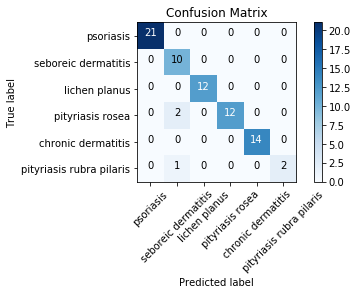

In [275]:
cm_plot_labels = ['psoriasis', 'seboreic dermatitis', 'lichen planus', 'pityriasis rosea', 'chronic dermatitis', 'pityriasis rubra pilaris']
plot_confusion_matrix(cm,cm_plot_labels,title='Confusion Matrix')